In [13]:
#Import Necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer

In [14]:
#Read and load dataset
data = pd.read_csv(r'C:\Users\sheba\OneDrive\Desktop\WA_Fn-UseC_-HR-Employee-Attrition.csv')
data   

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [15]:
#Check for missing values
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

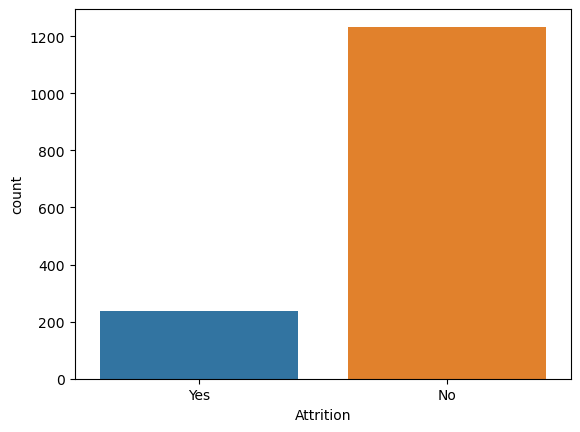

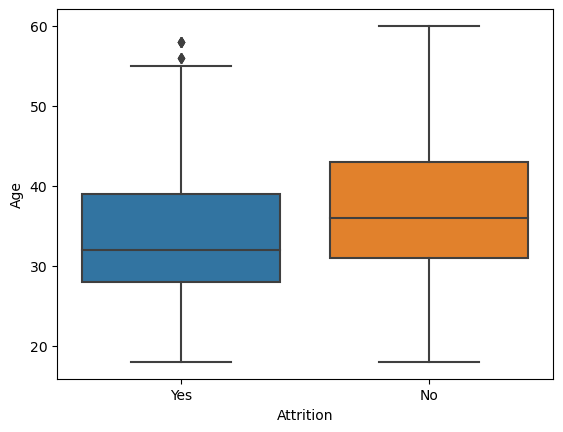

In [16]:
#Visualize an example of a quantitative variable (age) distribution by Attrition
sns.countplot(x='Attrition', data=data)
plt.show()

sns.boxplot(x='Attrition', y='Age', data=data)
plt.show()

In [17]:
#Convert categorical variables into dummies
data = pd.get_dummies(data, drop_first=True)

#Split dataset into features and target variable
X = data.drop('Attrition_Yes', axis=1)
y = data['Attrition_Yes']

#Train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
#Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

#Predict the results
y_pred = model.predict(X_test)

In [19]:
#Evaluate the model
print(f"Confusion Matrix:", confusion_matrix(y_test, y_pred))
print (f"Classification Report:", classification_report(y_test, y_pred))

Confusion Matrix: [[254   1]
 [ 35   4]]
Classification Report:               precision    recall  f1-score   support

       False       0.88      1.00      0.93       255
        True       0.80      0.10      0.18        39

    accuracy                           0.88       294
   macro avg       0.84      0.55      0.56       294
weighted avg       0.87      0.88      0.83       294



In [20]:
#Get feature importance
fi = model.feature_importances_
indices = np.argsort(fi)[::-1]

print("Feature ranking:")
for f in range (X.shape[1]):
    print(f"{f+1}.feature {indices[f]} ({fi[indices[f]]}))")

Feature ranking:
1.feature 11 (0.07178413424141764))
2.feature 46 (0.061896090205713766))
3.feature 1 (0.05460286092469394))
4.feature 5 (0.04924884274763837))
5.feature 0 (0.048570467721201604))
6.feature 19 (0.0477382626900045))
7.feature 12 (0.04739234143937193))
8.feature 7 (0.04142469007009861))
9.feature 2 (0.04004788855485236))
10.feature 22 (0.03603787261399799))
11.feature 25 (0.030903784106476578))
12.feature 13 (0.03040574535711202))
13.feature 14 (0.02947647662609856))
14.feature 18 (0.027808982794882524))
15.feature 23 (0.027507303054422796))
16.feature 20 (0.026764244002010572))
17.feature 6 (0.025845762751988906))
18.feature 24 (0.025392173651007648))
19.feature 9 (0.024593271403357042))
20.feature 10 (0.022737098629985242))
21.feature 45 (0.022351388940077994))
22.feature 16 (0.022160819897808288))
23.feature 8 (0.020787617323025524))
24.feature 21 (0.019463504949543933))
25.feature 3 (0.018476838013759572))
26.feature 26 (0.013748482133848126))
27.feature 43 (0.0099880

In [21]:
#Top 5 features
top_indices = indices[:5]
top_fi = fi[top_indices]
top_features = [X.columns[i] for i in top_indices]

print("Top 5 Features:")
for i in range(5):
    print(f"{i+1}.{top_features[i]}({top_fi[i]})")

Top 5 Features:
1.MonthlyIncome(0.07178413424141764)
2.OverTime_Yes(0.061896090205713766)
3.DailyRate(0.05460286092469394)
4.EmployeeNumber(0.04924884274763837)
5.Age(0.048570467721201604)


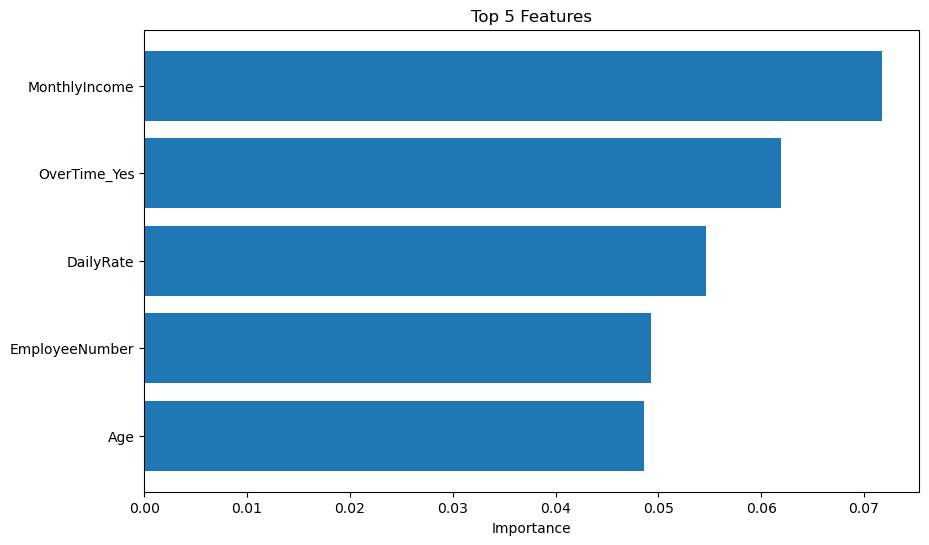

In [22]:
#Plot top 5 features
plt.figure(figsize=(10,6))
plt.title("Top 5 Features")
plt.barh(range(5), top_fi, align="center")
plt.yticks(range(5),top_features)
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.show()